<h1><b> Data Preprocessing and Feature Engineering on Diabetes Dataset

<h3> Project Goal</h3>
<p>
It is desired to develop a machine learning model that can predict whether people have diabetes when their characteristics are specified. I performed the necessary data analysis and feature engineering steps before developing the model.
</p>

<h3> Importing Required Libaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows' ,500)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

<h3>Import DataSet

In [7]:
df = pd.read_csv("C:/Users/KIIT/Desktop/Celebal Internship data science/assignment 6/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


<h3> General Information About to the DataSet

In [8]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [9]:
check_df(df)

######################### Head #########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
######################### Tail #########################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
763           10      101             76             48      180 32.900   
764            2      122        

<h3>Analysis of categorical and Numerical Variables

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th= 20):
    #Categeorical variable Selection
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype in ["unit8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    #Numrerical Variable Selection
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]

    num_cols = [col for col in dataframe.columns if col not in cat_cols]
    return cat_cols, num_cols, cat_but_car

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}" )
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 768
Variables: 9
Cat_cols: 1
Num_cols: 8
Cat_but_car: 0


In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts()/ len(dataframe)}))

    print("##########################################")
    if plot:
        sns.countplot(x = dataframe[col_name], data= dataframe)
        plt.show(block = True)

In [13]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in cat_cols:
        cat_summary(dataframe, col, plot = True)

         Outcome
Outcome         
0          0.651
1          0.349
##########################################


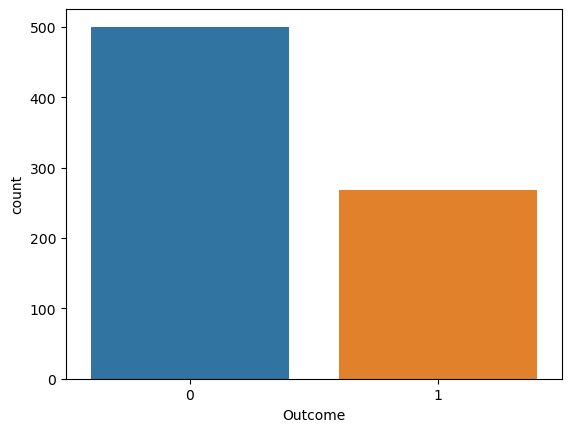

In [14]:
cat_summary_df(df)

In [15]:
def num_summary(dataframe, num_col, plot =False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_cols].describe(quantiles).T)

    if plot: 
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [16]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in num_cols:
        num_summary(dataframe, col, plot = True)

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

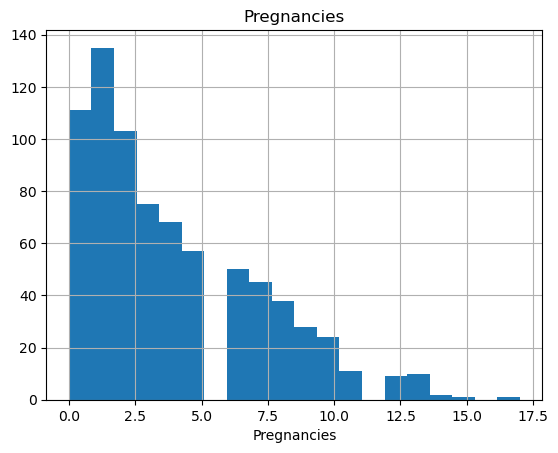

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

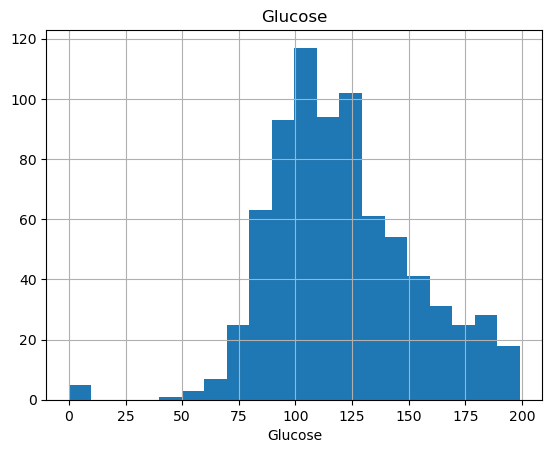

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

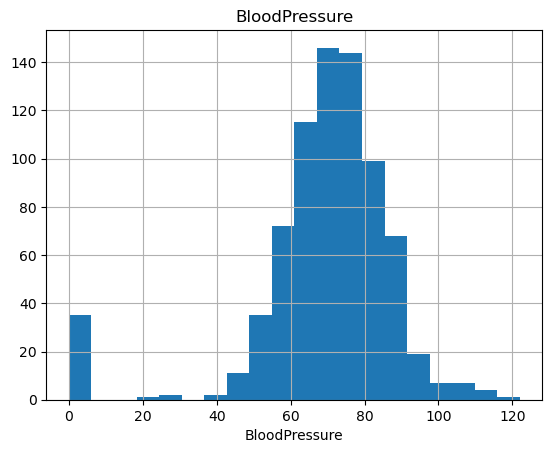

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

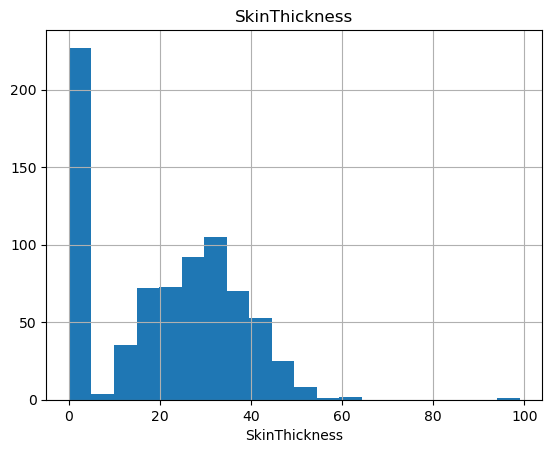

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

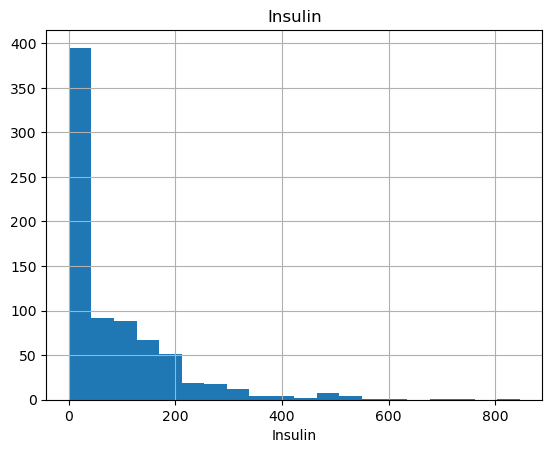

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

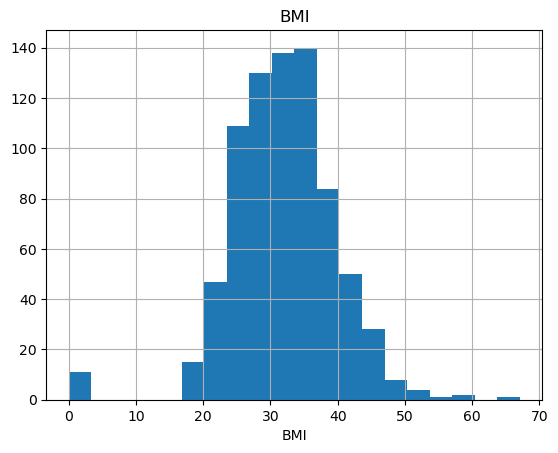

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

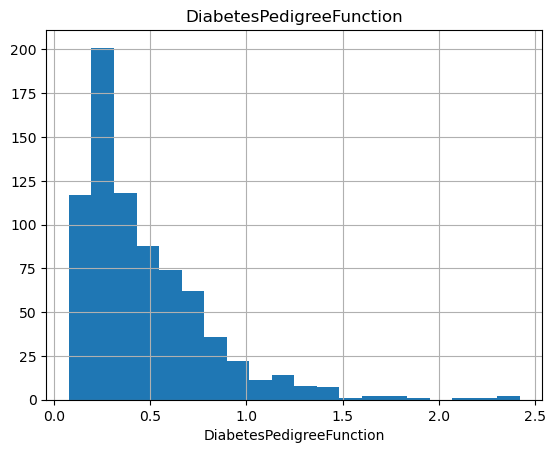

                           count    mean     std    min     5%    10%    20%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000   
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000   
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.140  0.165  0.219   
Age                      768.000  33.241  11.760 21.000 21.000 22.000 23.000   

                             30%     40%     50%     60%     70%     80%  \
Pregnancies                1.000   2.000   3.000   4.000   5.000   7.000   
Glucose                  102.000 109.000 117.000 125.000 134.000 147.000   
BloodPressure             64.000  68.000  72.000  7

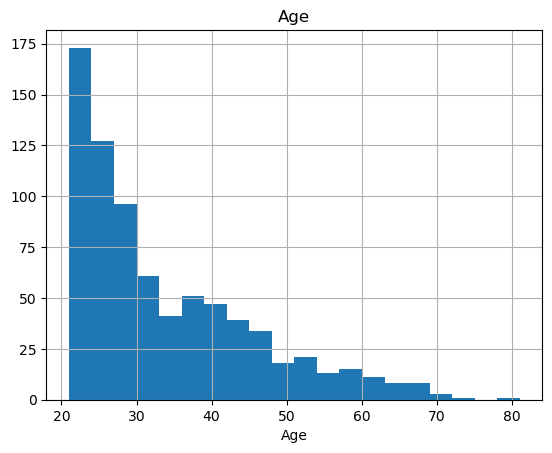

In [17]:
num_summary_df(df)

In [18]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("#############################################")

In [19]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [20]:
target_summary_with_num_df(df, "Outcome")

         Pregnancies
Outcome             
0              3.298
1              4.866
#############################################
         Glucose
Outcome         
0        109.980
1        141.257
#############################################
         BloodPressure
Outcome               
0               68.184
1               70.825
#############################################
         SkinThickness
Outcome               
0               19.664
1               22.164
#############################################
         Insulin
Outcome         
0         68.792
1        100.336
#############################################
           BMI
Outcome       
0       30.304
1       35.143
#############################################
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
#############################################
           Age
Outcome       
0       31.190
1       37.067
##################

<h3>Correlation Analysis

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


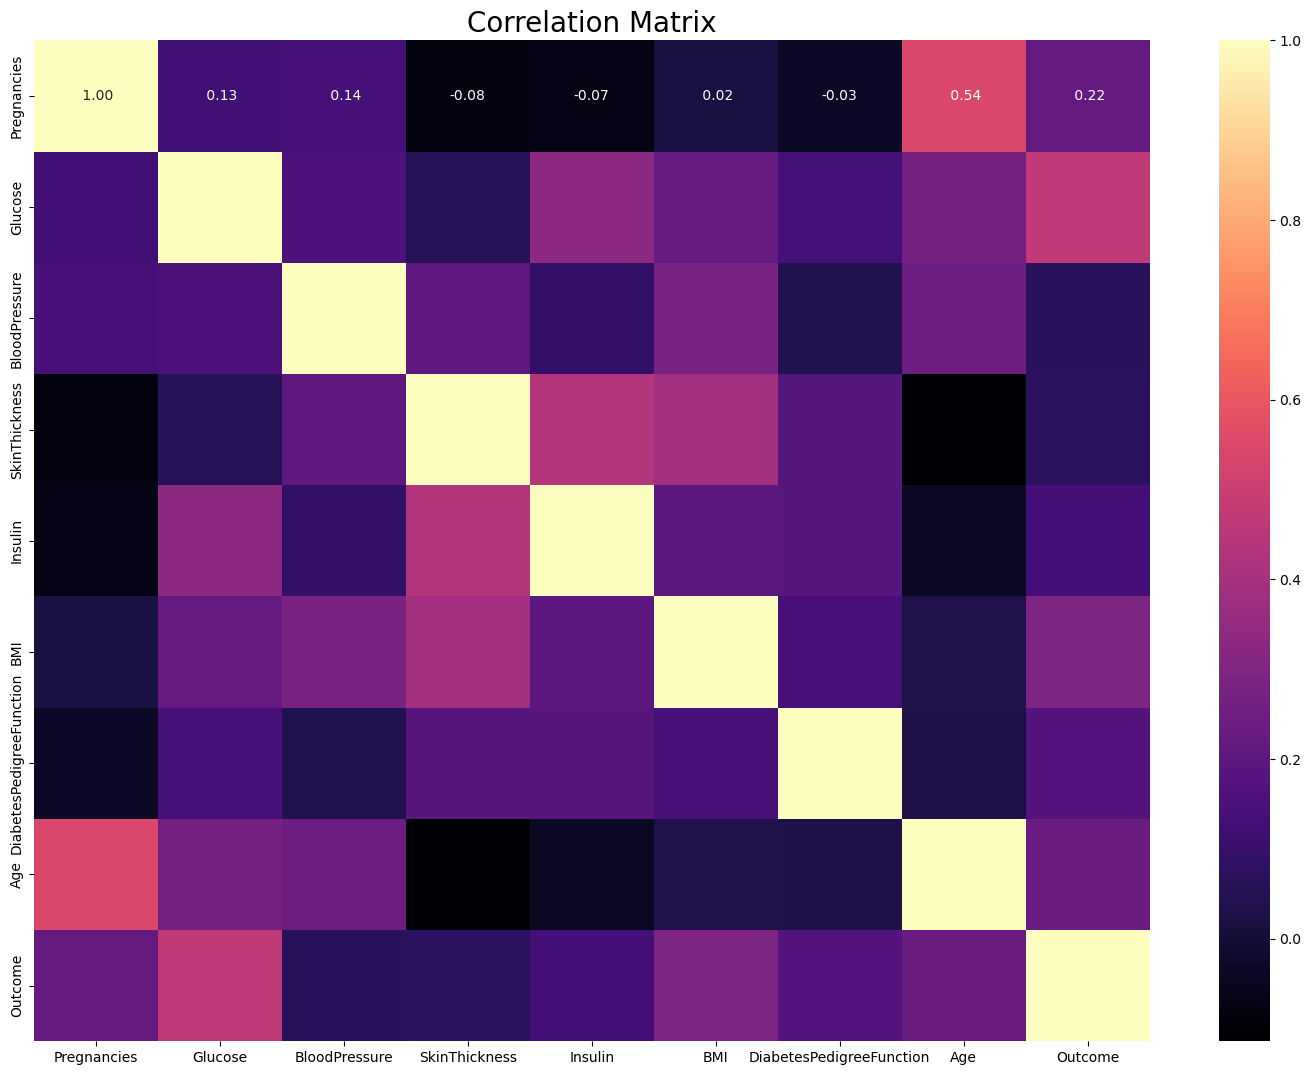

In [22]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot = True, fmt = " .2f", ax = ax, cmap="magma")

ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [23]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


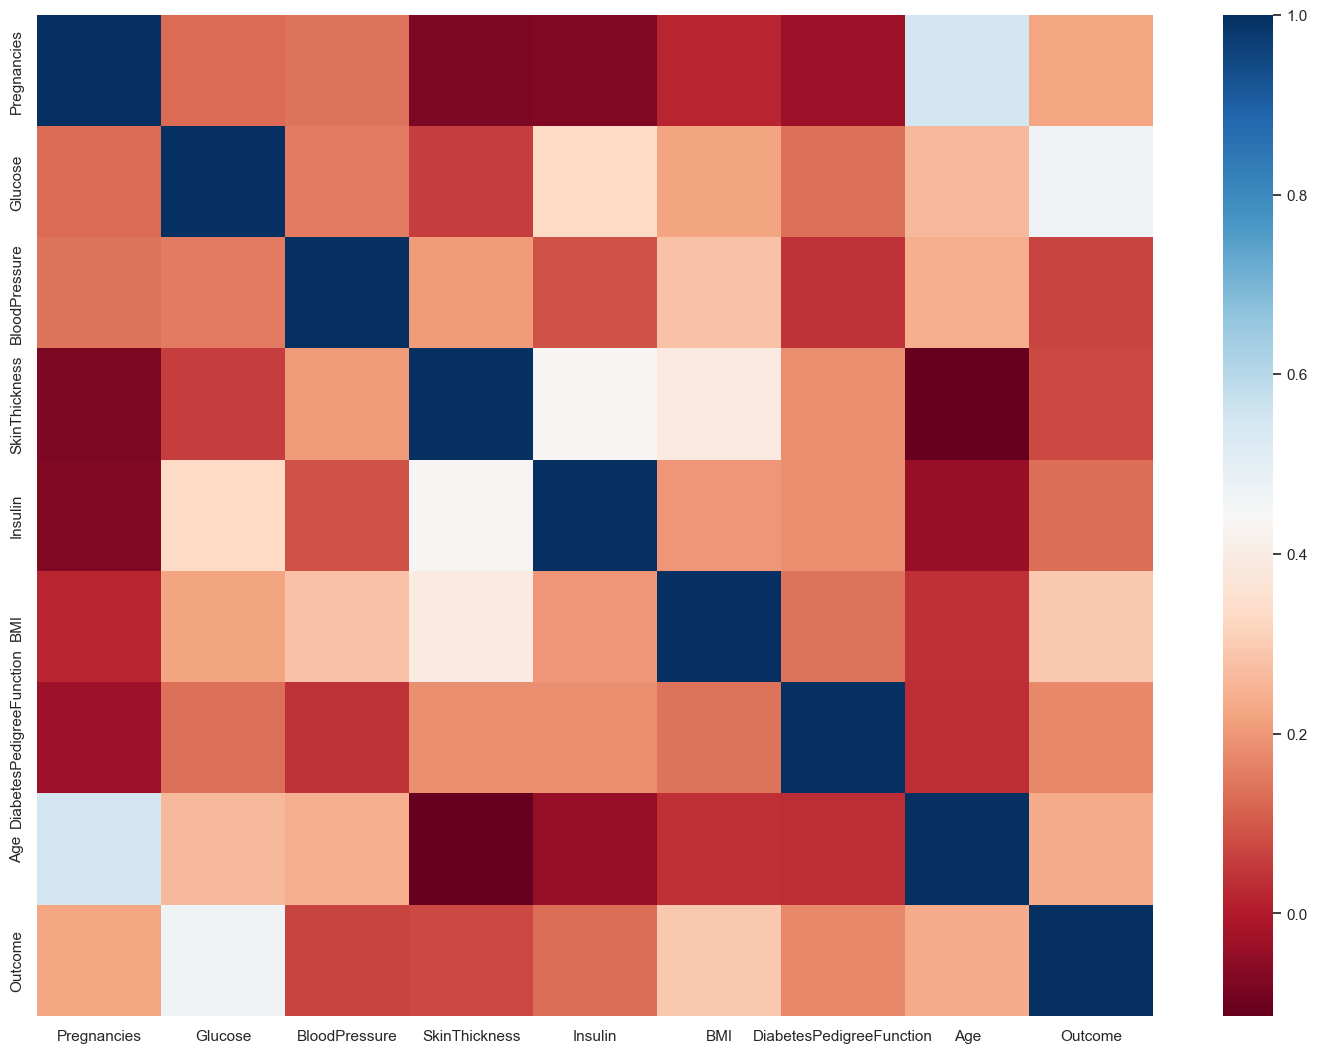

[]

In [24]:
high_correlated_cols(df, plot=True)

<h3> BASE MODEL Setup


In [25]:
y = df["Outcome"]
X= df.drop("Outcome", axis = 1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.38, random_state =17)

rf_model = RandomForestClassifier(random_state = 46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test),2)}")
print(f"Recall: {round(recall_score(y_pred, y_test),3)}")
print(f"Precision: {round(precision_score(y_pred, y_test),2)}")
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")

Accuracy: 0.76
Recall: 0.67
Precision: 0.59
F1: 0.63
Auc: 0.73


In [26]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_, 'Feature' :features.columns})
    plt.figure(figsize =(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x = "Value", y="Feature", data = feature_imp.sort_values(by="Value", ascending =False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importance.png')

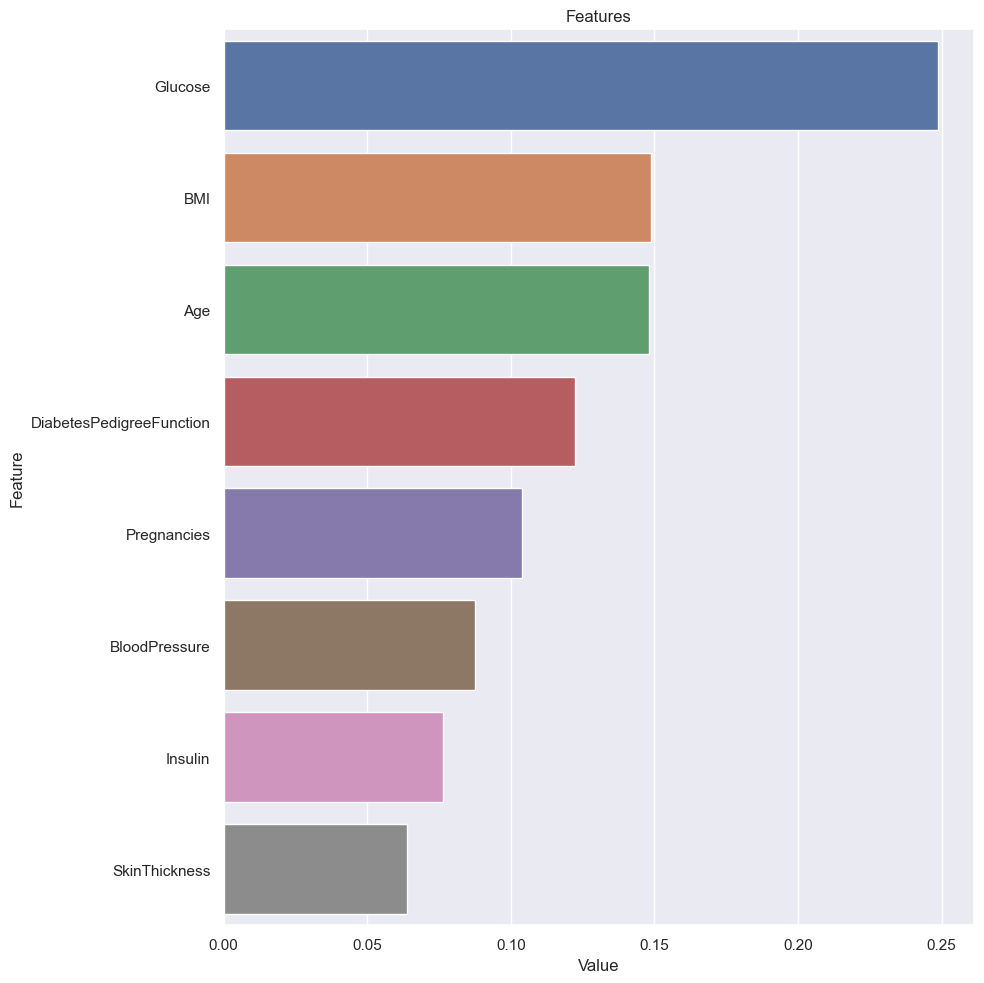

In [27]:
plot_importance(rf_model, X)

<h4> Feature Engineering

<h3> Missing Value Analysis

<p><b>Not:</b> It is known that a human cannot have variable values 0 other than Pregnancies and Outcome. Therefore, an action decision should be taken regarding these values, Values that are 0 can be assigned NaN.

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
zero_columns = [col for col in df.columns if(df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [30]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:
def missing_value_table(dataframe, na_name =False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending = False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis =1, keys = ["n_miss", "ratio"])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
          

In [35]:
na_columns = missing_value_table(df, na_name= True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [41]:
# Show Miising Value on Plot
def show_missing_value_plot(dataframe, bar=True, matrix=True, heatmap=True):
  %pip install missingno
  import missingno as msno
  if bar:
    msno.bar(dataframe);
  if matrix:
    msno.matrix(dataframe);
  if heatmap:
    msno.heatmap(dataframe);

Note: you may need to restart the kernel to use updated packages.


ValueError: could not convert string to float: '--'

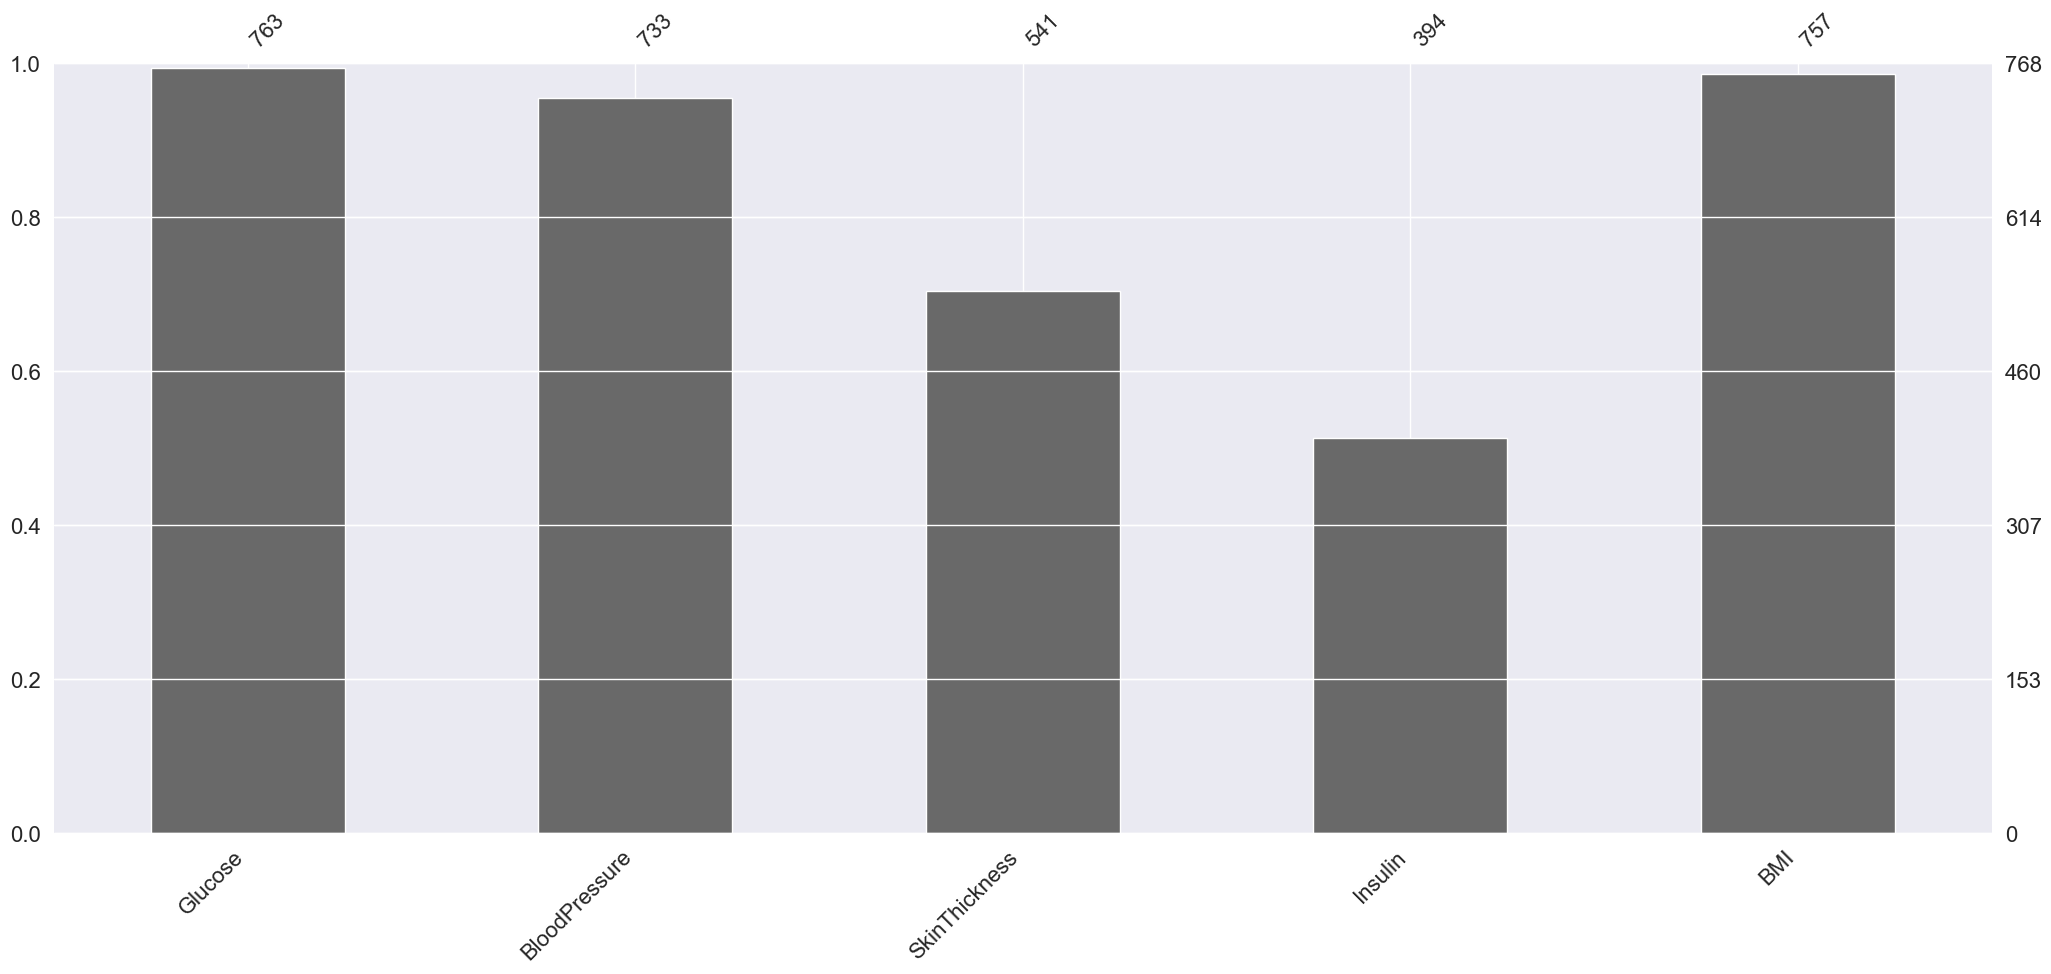

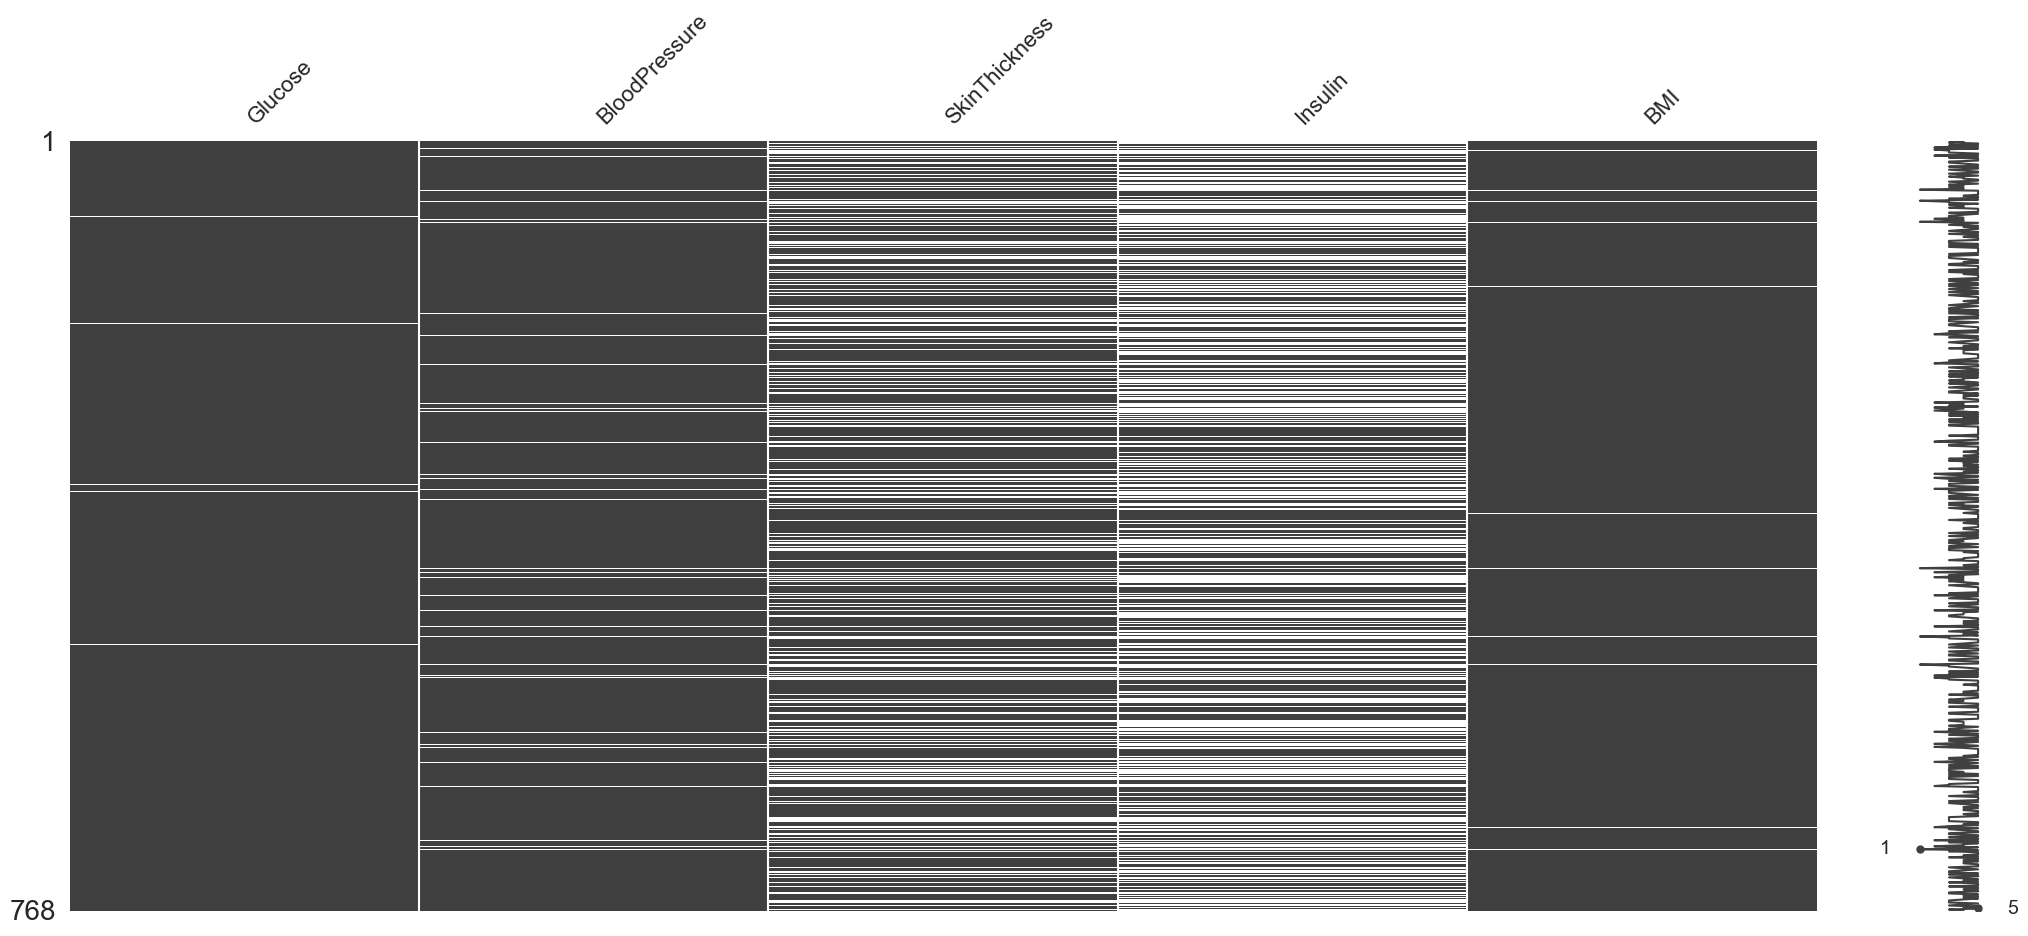

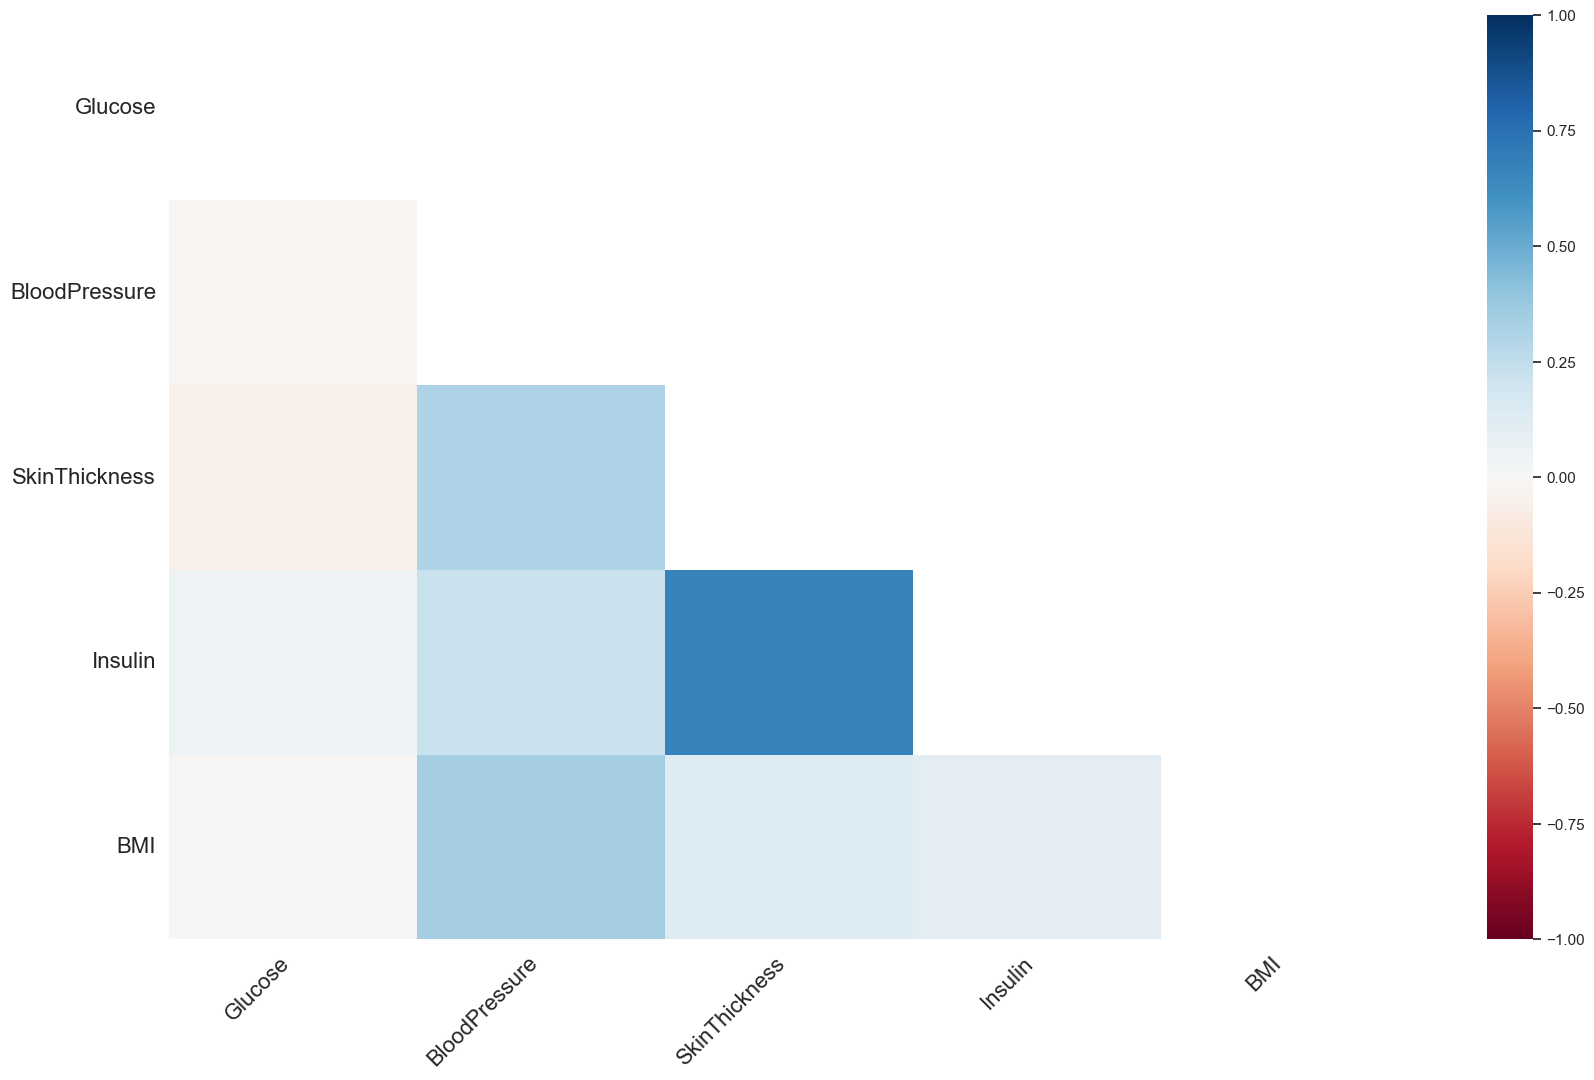

In [42]:
show_missing_value_plot(df[na_columns])

In [46]:
# Examining the Relationship of Missing Values with the Dependent Variable
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}))
    print("##################################################")

In [47]:
missing_vs_target(df,'Outcome')

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5
##################################################
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35
##################################################
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227
##################################################
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374
#################################################

In [48]:
#Assigning a Missing Value
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [49]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3>Outlier Analysis

In [75]:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [76]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [77]:
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name]>low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name]>up_limit), col_name] = up_limit

In [78]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [79]:
for col in df.columns:
  print(col, check_outlier(df, col))
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [80]:
for col in df.columns:
  print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


<h3> Feature Extraction

In [81]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [82]:
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [83]:
df.columns = [col.upper() for col in df.columns]

In [84]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,senior,Obese,obesesenior,highsenior,Normal,18500.000,888.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,mature,Overweight,obesemature,normalmature,Normal,10625.000,85.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,mature,Healthy,obesemature,highmature,Normal,22875.000,1464.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,Overweight,obesemature,normalmature,Normal,8366.000,89.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,Obese,obesemature,highmature,Abnormal,23016.000,0.000


<h3>Encoding Scaling


In [98]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [99]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [100]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)

In [101]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
def one_hot_encoding(dataframe, cat_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [104]:
df = one_hot_encoding(df, cat_cols, drop_first=True)

In [105]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,1,1,18500.000,888.000,False,False,True,True,False,False,False,True,False,False,False,False
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,0,1,10625.000,85.000,False,True,False,False,False,False,False,False,False,False,True,False
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,0,1,22875.000,1464.000,True,False,False,False,False,False,True,False,False,False,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,1,8366.000,89.000,False,True,False,False,False,False,False,False,False,False,True,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,0,0,23016.000,0.000,False,False,True,False,False,False,True,False,False,False,False,False


<h3> Modeling


In [106]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.78
Recall: 0.708
Precision: 0.63
F1: 0.67
Auc: 0.76


In [107]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

    Value                            Feature
1   0.150                            GLUCOSE
10  0.134                NEW_GLUCOSE*INSULIN
5   0.097                                BMI
11  0.096            NEW_GLUCOSE*PREGNANCIES
6   0.096           DIABETESPEDIGREEFUNCTION
7   0.094                                AGE
3   0.057                      SKINTHICKNESS
2   0.055                      BLOODPRESSURE
0   0.054                        PREGNANCIES
4   0.051                            INSULIN
18  0.030     NEW_AGE_GLUCOSE_NOM_highmature
22  0.023   NEW_AGE_GLUCOSE_NOM_normalmature
14  0.017                      NEW_BMI_Obese
9   0.009                  NEW_INSULIN_SCORE
13  0.008                 NEW_BMI_Overweight
12  0.008                    NEW_BMI_Healthy
8   0.005                        NEW_AGE_CAT
15  0.005        NEW_AGE_BMI_NOM_obesesenior
17  0.005   NEW_AGE_GLUCOSE_NOM_hiddensenior
19  0.004     NEW_AGE_GLUCOSE_NOM_highsenior
23  0.001   NEW_AGE_GLUCOSE_NOM_normalsenior
20  0.000 

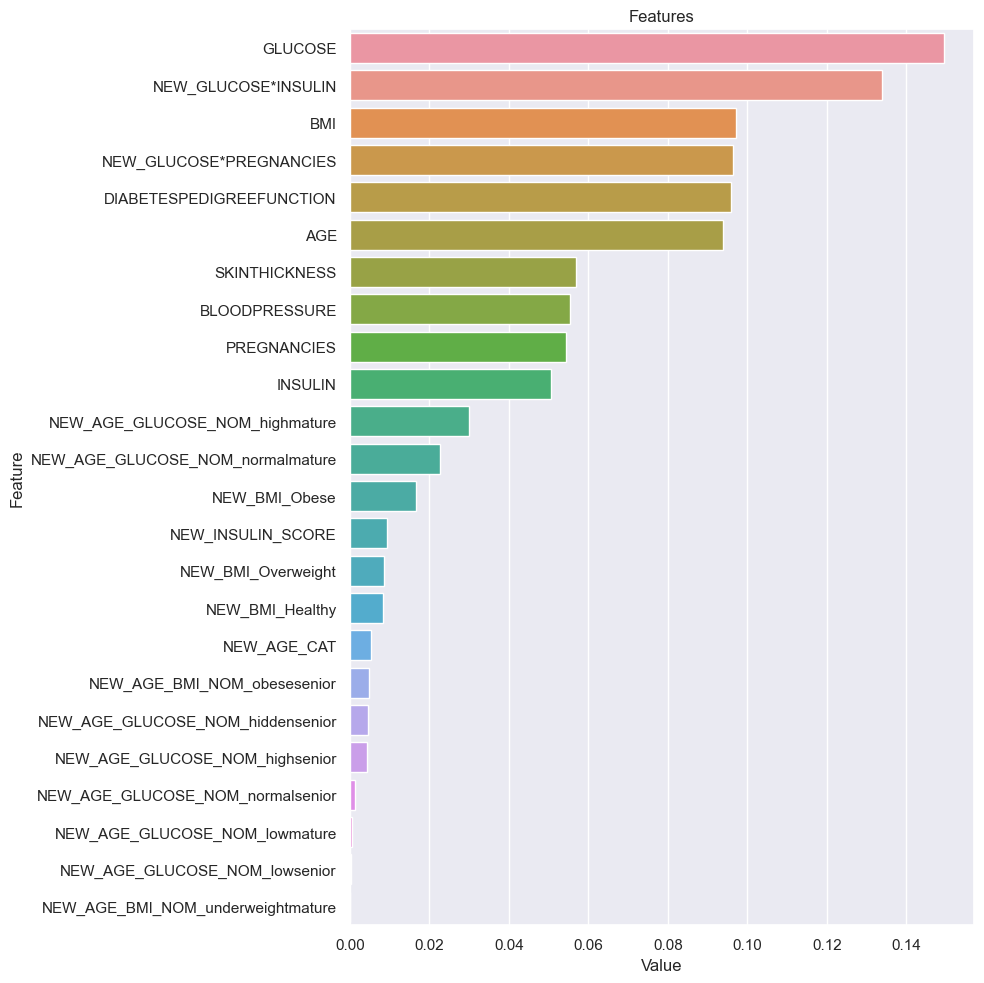

In [108]:
plot_importance(rf_model, X)

<H4> THANK YOU
